In [4]:
import pandas as pd
import warnings
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

In [7]:
movies = pd.read_csv('P4-Section6-Homework-Dataset.csv', encoding = "ISO-8859-1")

In [8]:
movies.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [46]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Day of Week             608 non-null    object  
 1   Director                608 non-null    object  
 2   Genre                   608 non-null    category
 3   Movie Title             608 non-null    object  
 4   Release Date            608 non-null    object  
 5   Studio                  608 non-null    string  
 6   Adjusted Gross ($mill)  608 non-null    object  
 7   Budget ($mill)          608 non-null    float64 
 8   Gross ($mill)           608 non-null    object  
 9   IMDb Rating             608 non-null    float64 
 10  MovieLens Rating        608 non-null    float64 
 11  Overseas ($mill)        608 non-null    object  
 12  Overseas%               608 non-null    float64 
 13  Profit ($mill)          608 non-null    object  
 14  Profit%                 60

In [47]:
movies.Genre = movies.Genre.astype('category')
movies.Studio = movies.Studio.astype('object')

In [74]:
genre_filter = ['action', 'adventure', 'animation', 'comedy', 'drama']
movies2 = movies[movies.Genre.isin(genre_filter)]
movies2.Genre.unique()

['action', 'comedy', 'adventure', 'animation', 'drama']
Categories (5, object): ['action', 'comedy', 'adventure', 'animation', 'drama']

In [75]:
movies2.Studio.unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal', 'WB',
       'WB/New Line', 'Paramount Pictures', 'Fox', 'Screen Gems',
       'StudioCanal', 'Fox Searchlight Pictures', 'Path_ Distribution',
       'DreamWorks', 'Revolution Studios', 'New Line Cinema',
       'Dimension Films', 'Lionsgate/Summit', 'TriStar',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'MiraMax', 'Weinstein Company', 'Gramercy Pictures',
       'Colombia Pictures', 'Summit Entertainment', 'Vestron Pictures',
       'IFC', 'MGM', 'UA Entertainment', 'New Market Films', 'Orion'],
      dtype=object)

In [72]:
studio_filter = ['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox']
movies3 = movies2[movies2.Studio.isin(studio_filter)]
movies3.Studio.unique()

array(['Buena Vista Studios', 'Sony', 'Universal', 'WB',
       'Paramount Pictures', 'Fox'], dtype=object)

In [76]:
movies3.Genre.unique()

['action', 'comedy', 'adventure', 'animation', 'drama']
Categories (5, object): ['action', 'comedy', 'adventure', 'animation', 'drama']

In [83]:
# Having issues with this plot. 
# It shows categories on x-axis that should not be in this dataset
# Tired, no idea. Will check back tomorrow

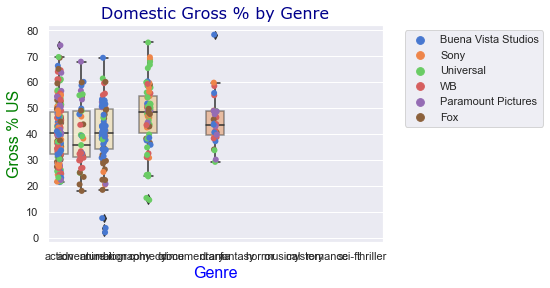

In [78]:
sns.set(style="darkgrid", palette='muted', color_codes='True') # We can use Seaborn styling even in a pyplot chart
# The plot with an unspecified location will go to the last box
# The next plot will go into the subplot
# We can then use suplots() methods to control the original plot

ax = sns.boxplot(data=movies3, x= 'Genre', y= 'Gross % US', \
    palette='YlOrRd') # Yellow+Orage+Red
plt.setp(ax.artists, alpha=0.5)

sns.stripplot(x= 'Genre', y= 'Gross % US', data=movies3, jitter=True, \
    size=6, linewidth=0, hue='Studio')

# Add a title
ax.axes.set_title('Domestic Gross % by Genre', fontsize=16, \
    color='DarkBlue', fontname='Verdana')
ax.set_xlabel('Genre', fontsize=16, color='Blue')
ax.set_ylabel('Gross % US', fontsize=16, color='Green')
# to display the legend with shadow and frame visibility
ax.legend(bbox_to_anchor=(1.05,1), loc=2)


In [82]:
movies3

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Friday,Steven Spielberg,adventure,Jurassic Park,11/06/1993,Universal,"1,693.80",63.0,"1,029.20",8.1,3.66,626.7,60.9,966.2,1533.7,127,402.5,39.1
600,Friday,Steven Spielberg,adventure,E.T.: The Extra-Terrestrial,11/06/1982,Universal,"1,953.90",10.5,792.9,7.9,3.76,357.8,45.1,782.4,7451.4,115,435.1,54.9
602,Tuesday,Richard Fleischer,adventure,Doctor Dolittle,19/12/1967,Fox,"2,096.80",70.5,294.5,5.3,3.01,150.3,51.0,224,317.7,152,144.2,49.0
604,Wednesday,George Lucas,action,Star Wars,25/05/1977,Fox,"3,042.80",11.0,775.4,8.7,4.19,314.4,40.5,764.4,6949.1,121,461.0,59.5
